In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
#get all the Files
path='/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Toronto/Plotting_months/June1991-Feb1992/'
file_paths = []
file_names = sorted(os.listdir(path))
for name in file_names:
        filepath = os.path.join(path,name)
        if os.path.isfile(filepath) and filepath[-4:] == '.txt':
            file_paths.append(filepath)
            

In [29]:
print file_paths [0]
print file_paths[-1]
# Check number of files in directory
import fnmatch

print len(fnmatch.filter(os.listdir('/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Toronto/Plotting_months/June1991-Feb1992/'), '*.txt'))

/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Toronto/Plotting_months/June1991-Feb1992/1991.06.24.txt
/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Toronto/Plotting_months/June1991-Feb1992/1992.02.12.txt
22


In [30]:
df_Toronto = pd.DataFrame()
for files in file_paths:
    print files
    #Read in First First File
    data = np.loadtxt(fname=files, delimiter=',', skiprows=2, usecols=(0,1))
    col1 = data[:,0]
    col2 = data[:,1]
    altitude = col1/1000# Converts altitude to km
    backscatter=col2
    Date=pd.to_datetime(files[-14:-4], format='%Y.%m.%d') # Converts filename date to Pandas datetime
    d_backscatter={Date : backscatter}
    #print Date
    print d_backscatter
    if df_Toronto.empty:
        df_Toronto = pd.DataFrame(d_backscatter, index=altitude)
    else:
        df_temp_BS=pd.DataFrame(d_backscatter, index=altitude)
        df_Toronto = df_Toronto.join(df_temp_BS)


#Transposes Axes so that the TIme is the Index, Makes reading it back in easier.        
df_Toronto=df_Toronto.transpose()

/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Toronto/Plotting_months/June1991-Feb1992/1991.06.24.txt
{Timestamp('1991-06-24 00:00:00'): array([ 1.01,  1.01,  1.01,  1.02,  1.02,  1.02,  1.02,  1.02,  1.03,
        1.03,  1.03,  1.03,  1.03,  1.03,  1.03,  1.04,  1.04,  1.05,
        1.05,  1.05,  1.05,  1.05,  1.06,  1.07,  1.07,  1.07,  1.07,
        1.07,  1.07,  1.06,  1.05,  1.06,  1.06,  1.06,  1.06,  1.05,
        1.05,  1.05,  1.04,  1.04,  1.04,  1.05,  1.05,  1.04,  1.03,
        1.03,  1.03,  1.03,  1.03,  1.02,  1.02,  1.03,  1.03,  1.02,
        1.02,  1.02,  1.02,  1.02,  1.02,  1.02,  1.01,  1.02,  1.02,
        1.02,  1.01,  1.01,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ])}
/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Toronto/Plotting_months/June1991-Feb1992/1991.07.10.txt
{Timestamp('1991-07-10 00:00:00'): array([ 1.03,  1.01,  1.03,  1.03,  1.  ,  1.04,  1.04,  1.02,  1.02,
        1.01,  1.  ,  1.01,  1.02,  1.03,  1.04,  1.05,  1.07,  1.07,
        1.09,  1.1 ,  1.1 ,

In [31]:
#Save data to CSV File
df_Toronto.to_csv(path+'Toronto_June1991-Feb1992.csv')

In [32]:
#Read from CSV File
Toronto_data = pd.DataFrame()
Toronto_data=pd.read_csv('/nfs/see-fs-01_users/gy11s2s/Python/NDACC_files/Toronto/Plotting_months/June1991-Feb1992/Toronto_June1991-Feb1992.csv',
                     index_col=0,parse_dates=True,infer_datetime_format=True)
#Convert the frame to its Numpy-array representation.
Toronto_data=Toronto_data.transpose() # Transpose it so it is easier to plot
Toronto_data.as_matrix #Turns it into a normal Numpy array;
                    #Doing this makes it so you dont have to define X, Y and Z when plotting

<bound method DataFrame.as_matrix of         1991-06-24  1991-07-10  1991-07-14  1991-07-15  1991-07-22  \
13.65         1.01        1.04         NaN        0.99         NaN   
13.95         1.01        1.04         NaN        1.09         NaN   
14.25         1.01        1.02        1.68        1.26         NaN   
14.55         1.02        1.02        1.16        1.40         NaN   
14.85         1.02        1.01        1.10        1.17         NaN   
15.15         1.02        1.00        1.10        1.20         NaN   
15.45         1.02        1.01        1.08        1.16         NaN   
15.75         1.02        1.02        1.07        1.11         NaN   
16.049        1.03        1.03        1.06        1.05        1.34   
16.35         1.03        1.04        1.06        1.03        2.87   
16.65         1.03        1.05        1.06        1.03        3.00   
16.95         1.03        1.07        1.06        1.03        2.74   
17.25         1.03        1.07        1.06        1.0

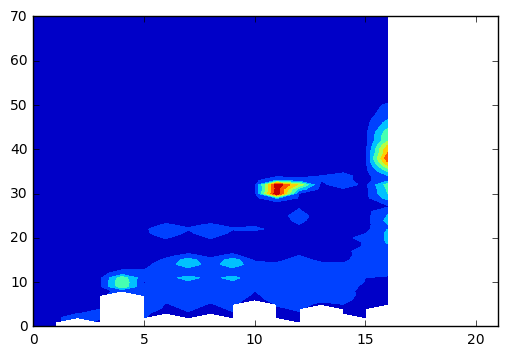

In [33]:
#Plot Contour form Data Frame As a Matrix

fig = plt.figure()
graph = fig.add_subplot(111)
graph.contourf(Toronto_data)
#Not quite sure why it does not use the dates on the x axis or actual altitudes

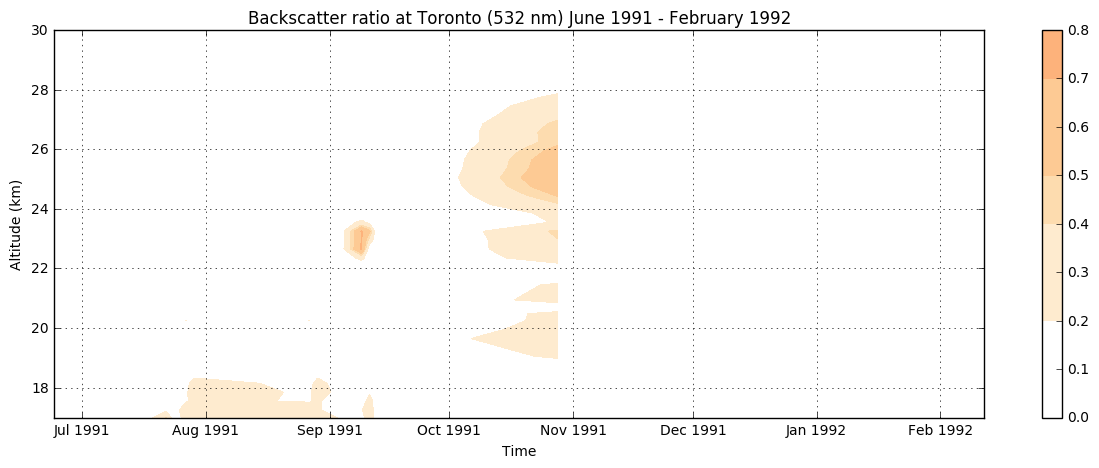

In [34]:
#Using column and Index Info
Dates=Toronto_data.columns# This is in date time format so it is easy to deal with
#print Dates
Alts=map(float,pd.Index.tolist(Toronto_data.index)) #Initially this is in a funny Index object so we need to change to a list of float values
#print Alts


# define the colormap
cmap = plt.cm.get_cmap('OrRd', 11)
# extract all colors from the map
cmaplist = [cmap(i) for i in range(cmap.N)]
# force the first color entry to be grey
cmaplist[0] = (1.0,1.0,1.0,1.0)
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)
#Set Color For Values less than plot Bounds
cmap.set_under('w')


Toronto_data_masked_array=np.ma.masked_where(Toronto_data<1, Toronto_data) # Masking out data below a Threshold

#Make it Log-Scale to See FIne Details.
Toronto_data_masked_array_Log=np.log10(Toronto_data_masked_array)

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
Toronto=ax.contourf(Dates,Alts,Toronto_data_masked_array_Log,8,cmap=cmap, vmin=0, vmax=2)
Toronto=ax.contourf(Dates,Alts,Toronto_data_masked_array_Log,8,cmap=cmap, vmin=0, vmax=2)
cbar = plt.colorbar(Toronto) # Creates colour bar/scale
plt.title('Backscatter ratio at Toronto (532 nm) June 1991 - February 1992')
plt.xlabel('Time')
plt.ylabel('Altitude (km)')
plt.grid()
plt.ylim(17,30)
fig.savefig('/nfs/see-fs-01_users/gy11s2s/Python/Layers_over_time_analysis/Lidar/June1991-Feb1992_Toronto.png', bbox_inches='tight')